In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def geometric_weight_function( rper , rpar ):
    # this seems the opposite of what I thought...
    return rper**2 / ( rpar**2 + rper**2 )

def rsd_and_geometric_weight_function( rper, rpar, r0, rsd ):
    return 1

def no_weights( rper, rpar ):
    return np.ones( rper.shape )

In [3]:
def bin_correlation_function(rper, rpar, xi, var_xi, bins, custom_weight_func, epsilon=1e-10):
    """
    Calculate the binned correlation function xi(r) as a weighted sum, and its error.

    Returns:
    r_centers : array
        Bin centers.
    xi_r : array
        Weighted xi(r) in each bin.
    xi_err : array
        Error on xi(r) in each bin.
    """

    rper_2d, rpar_2d = np.meshgrid(rper, rpar, indexing='ij')
    r = np.sqrt( rper_2d**2 + rpar_2d**2 ).T
    w = custom_weight_func( rper_2d , rpar_2d ).T  / ( var_xi + epsilon )

    r_flat = r.flatten()
    xi_flat = xi.flatten()
    w_flat = w.flatten()

    xi_r = []
    xi_var = []
    r_centers = 0.5 * (bins[:-1] + bins[1:])
    for i in range(len(bins) - 1):
        mask = (r_flat >= bins[i]) & (r_flat < bins[i+1])
        if np.any(mask):
            xi_r.append(np.average(xi_flat[mask], weights=w_flat[mask]))
            xi_var.append( 1.0 / np.sum( w_flat[mask] ) )
        else:
            xi_r.append(np.nan)
            xi_var.append(np.nan)

    return r_centers, np.array(xi_r), np.array(xi_var) , custom_weight_func( rper_2d , rpar_2d )


In [157]:
# BGS_ANY_xi_gn_p_observed_observed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/BGS_ANY_xi_gn_p_observed_observed.npy')
# BGS_ANY_xi_gn_x_observed_observed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/BGS_ANY_xi_gn_x_observed_observed.npy')
# BGS_ANY_xi_gn_var_observed_observed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/BGS_ANY_xi_gn_var_observed_observed.npy')

# BGS_ANY_xi_gn_p_rsd_removed_rsd_removed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/BGS_ANY_xi_gn_p_rsd_removed_rsd_removed.npy')
# BGS_ANY_xi_gn_x_rsd_removed_rsd_removed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/BGS_ANY_xi_gn_x_rsd_removed_rsd_removed.npy')
# BGS_ANY_xi_gn_var_rsd_removed_rsd_removed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/BGS_ANY_xi_gn_var_rsd_removed_rsd_removed.npy')

# BGS_ANY_xi_gn_p_reconstructed_reconstructed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/BGS_ANY_xi_gn_p_reconstructed_reconstructed.npy')
# BGS_ANY_xi_gn_x_reconstructed_reconstructed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/BGS_ANY_xi_gn_x_reconstructed_reconstructed.npy')
# BGS_ANY_xi_gn_var_reconstructed_reconstructed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/BGS_ANY_xi_gn_var_reconstructed_reconstructed.npy')

BGS_ANY_xi_gn_p_observed_observed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/BGS_ANY_xi_gn_p_observed_observed.npy')
BGS_ANY_xi_gn_x_observed_observed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/BGS_ANY_xi_gn_x_observed_observed.npy')
BGS_ANY_xi_gn_var_observed_observed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/BGS_ANY_xi_gn_var_observed_observed.npy')

BGS_ANY_xi_gn_p_rsd_removed_rsd_removed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/BGS_ANY_xi_gn_p_rsd_removed_rsd_removed.npy')
BGS_ANY_xi_gn_x_rsd_removed_rsd_removed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/BGS_ANY_xi_gn_x_rsd_removed_rsd_removed.npy')
BGS_ANY_xi_gn_var_rsd_removed_rsd_removed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/BGS_ANY_xi_gn_var_rsd_removed_rsd_removed.npy')

BGS_ANY_xi_gn_p_reconstructed_reconstructed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/BGS_ANY_xi_gn_p_reconstructed_reconstructed.npy')
BGS_ANY_xi_gn_x_reconstructed_reconstructed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/BGS_ANY_xi_gn_x_reconstructed_reconstructed.npy')
BGS_ANY_xi_gn_var_reconstructed_reconstructed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/BGS_ANY_xi_gn_var_reconstructed_reconstructed.npy')

In [158]:
# LRG_xi_gn_p_observed_observed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_  /LRG_xi_gn_p_observed_observed.npy')
# LRG_xi_gn_x_observed_observed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/LRG_xi_gn_x_observed_observed.npy')
# LRG_xi_gn_var_observed_observed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/LRG_xi_gn_var_observed_observed.npy')

# LRG_xi_gn_p_rsd_removed_rsd_removed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/LRG_xi_gn_p_rsd_removed_rsd_removed.npy')
# LRG_xi_gn_x_rsd_removed_rsd_removed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/LRG_xi_gn_x_rsd_removed_rsd_removed.npy')
# LRG_xi_gn_var_rsd_removed_rsd_removed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/LRG_xi_gn_var_rsd_removed_rsd_removed.npy')

# LRG_xi_gn_p_reconstructed_reconstructed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/LRG_xi_gn_p_reconstructed_reconstructed.npy')
# LRG_xi_gn_x_reconstructed_reconstructed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/LRG_xi_gn_x_reconstructed_reconstructed.npy')
# LRG_xi_gn_var_reconstructed_reconstructed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements/LRG_xi_gn_var_reconstructed_reconstructed.npy')

LRG_xi_gn_p_observed_observed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/LRG_xi_gn_p_observed_observed.npy')
LRG_xi_gn_x_observed_observed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/LRG_xi_gn_x_observed_observed.npy')
LRG_xi_gn_var_observed_observed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/LRG_xi_gn_var_observed_observed.npy')

LRG_xi_gn_p_rsd_removed_rsd_removed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/LRG_xi_gn_p_rsd_removed_rsd_removed.npy')
LRG_xi_gn_x_rsd_removed_rsd_removed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/LRG_xi_gn_x_rsd_removed_rsd_removed.npy')
LRG_xi_gn_var_rsd_removed_rsd_removed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/LRG_xi_gn_var_rsd_removed_rsd_removed.npy')

LRG_xi_gn_p_reconstructed_reconstructed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/LRG_xi_gn_p_reconstructed_reconstructed.npy')
LRG_xi_gn_x_reconstructed_reconstructed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/LRG_xi_gn_x_reconstructed_reconstructed.npy')
LRG_xi_gn_var_reconstructed_reconstructed = np.load('/n17data/murray/desi_data/DESI/correlation_function_measurements_2mpc/LRG_xi_gn_var_reconstructed_reconstructed.npy')

In [159]:
def calculate_results( xi_p, xi_x, var_xi, bins, custom_weight_func , rper , rpar ):

    r_centers, xi_p, xi_p_var, weights = bin_correlation_function(
        rper, rpar, xi_p, var_xi,
        bins=bins,
        custom_weight_func=custom_weight_func
    )

    r_centers, xi_x, xi_x_var, weights = bin_correlation_function(
        rper, rpar, xi_x, var_xi,
        bins=bins,
        custom_weight_func=custom_weight_func
    )

    return r_centers, xi_p , xi_p_var , xi_x , xi_x_var, weights

In [160]:
BGS_ANY_xi_gn_p_reconstructed_reconstructed.shape, BGS_ANY_xi_gn_x_observed_observed.shape, BGS_ANY_xi_gn_p_rsd_removed_rsd_removed.shape

((200, 100), (200, 100), (200, 100))

# BGS

In [172]:
r_bins = np.linspace( 0.1 , 200 , 30 )
# r_bins = np.logspace( 0 , np.log10( 200 ) , 10 )
# r_bins = np.linspace( 40 / 0.7 , 200 / 0.7 , 22 )

rper_cents = np.linspace( 0.1 , 200, 200 )
rpar_cents = np.linspace( -200, 200, 400 )

rper_cents = np.linspace( 0.1 , 200, 100 )
rpar_cents = np.linspace( -200, 200, 200 )

In [173]:
r, xi_p_recon_nw, xi_p_recon_var_nw, xi_x_recon_nw, xi_x_recon_var_nw, weights_recon = calculate_results( BGS_ANY_xi_gn_p_reconstructed_reconstructed,
                                                                                                BGS_ANY_xi_gn_x_reconstructed_reconstructed,
                                                                                                BGS_ANY_xi_gn_var_reconstructed_reconstructed,
                                                                                                bins=r_bins,
                                                                                                custom_weight_func=no_weights,
                                                                                                rper=rper_cents,
                                                                                                rpar=rpar_cents
                                                                                            )

r, xi_p_observed_nw, xi_p_observed_var_nw, xi_x_observed_nw, xi_x_observed_var_nw, weights_observed_nw = calculate_results( BGS_ANY_xi_gn_p_observed_observed,
                                                                                                BGS_ANY_xi_gn_x_observed_observed,
                                                                                                BGS_ANY_xi_gn_var_observed_observed,
                                                                                                bins=r_bins,
                                                                                                custom_weight_func=no_weights,
                                                                                                rper=rper_cents,
                                                                                                rpar=rpar_cents
                                                                                            )

r, xi_p_rsd_nw, xi_p_rsd_var_nw, xi_x_rsd_nw, xi_x_rsd_var_nw, weights_rsd_nw = calculate_results( BGS_ANY_xi_gn_p_rsd_removed_rsd_removed,
                                                                                                BGS_ANY_xi_gn_x_rsd_removed_rsd_removed,
                                                                                                BGS_ANY_xi_gn_var_rsd_removed_rsd_removed,
                                                                                                bins=r_bins,
                                                                                                custom_weight_func=no_weights,
                                                                                                rper=rper_cents,
                                                                                                rpar=rpar_cents
                                                                                            )

r, xi_p_recon, xi_p_recon_var, xi_x_recon, xi_x_recon_var, weights_recon = calculate_results( BGS_ANY_xi_gn_p_reconstructed_reconstructed,
                                                                                                BGS_ANY_xi_gn_x_reconstructed_reconstructed,
                                                                                                BGS_ANY_xi_gn_var_reconstructed_reconstructed,
                                                                                                bins=r_bins,
                                                                                                custom_weight_func=geometric_weight_function,
                                                                                                rper=rper_cents,
                                                                                                rpar=rpar_cents
                                                                                            )

r, xi_p_observed, xi_p_observed_var, xi_x_observed, xi_x_observed_var, weights_observed = calculate_results( BGS_ANY_xi_gn_p_observed_observed,
                                                                                                BGS_ANY_xi_gn_x_observed_observed,
                                                                                                BGS_ANY_xi_gn_var_observed_observed,
                                                                                                bins=r_bins,
                                                                                                custom_weight_func=geometric_weight_function,
                                                                                                rper=rper_cents,
                                                                                                rpar=rpar_cents
                                                                                            )

r, xi_p_rsd, xi_p_rsd_var, xi_x_rsd, xi_x_rsd_var, weights_rsd = calculate_results( BGS_ANY_xi_gn_p_rsd_removed_rsd_removed,
                                                                                                BGS_ANY_xi_gn_x_rsd_removed_rsd_removed,
                                                                                                BGS_ANY_xi_gn_var_rsd_removed_rsd_removed,
                                                                                                bins=r_bins,
                                                                                                custom_weight_func=geometric_weight_function,
                                                                                                rper=rper_cents,
                                                                                                rpar=rpar_cents
                                                                                            )

Text(0.5, 1.0, 'Projected Correlation Function $\\xi_p(r)$: Geometric vs No Weight')

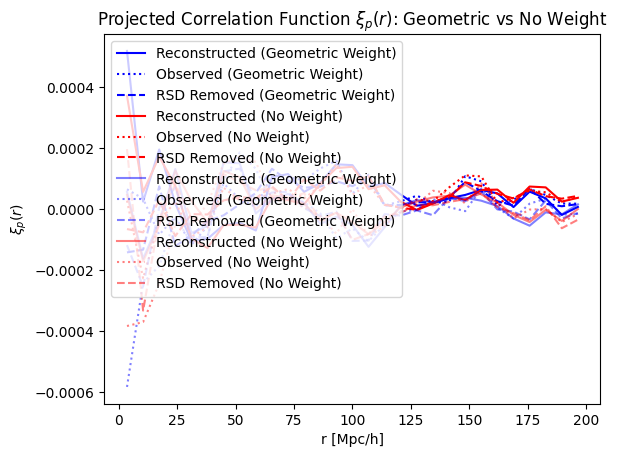

In [ ]:
plt.plot(r, xi_p_recon, 'b-', label='Reconstructed (Geometric Weight)')
plt.plot(r, xi_p_observed, 'b:', label='Observed (Geometric Weight)')
plt.plot(r, xi_p_rsd, 'b--', label='RSD Removed (Geometric Weight)')

plt.plot(r, xi_p_recon_nw, 'r-', label='Reconstructed (No Weight)')
plt.plot(r, xi_p_observed_nw, 'r:', label='Observed (No Weight)')
plt.plot(r, xi_p_rsd_nw, 'r--', label='RSD Removed (No Weight)')

plt.plot(r, xi_x_recon, 'b-', label='Reconstructed (Geometric Weight)' , alpha = 0.5)
plt.plot(r, xi_x_observed, 'b:', label='Observed (Geometric Weight)' , alpha = 0.5)
plt.plot(r, xi_x_rsd, 'b--', label='RSD Removed (Geometric Weight)' , alpha = 0.5)

plt.plot(r, xi_x_recon_nw, 'r-', label='Reconstructed (No Weight)' , alpha = 0.5)
plt.plot(r, xi_x_observed_nw, 'r:', label='Observed (No Weight)' , alpha = 0.5)
plt.plot(r, xi_x_rsd_nw, 'r--', label='RSD Removed (No Weight)' , alpha = 0.5)

plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi_p(r)$')
plt.legend()
plt.title(r'Projected Correlation Function $\xi_p(r)$: Geometric vs No Weight')


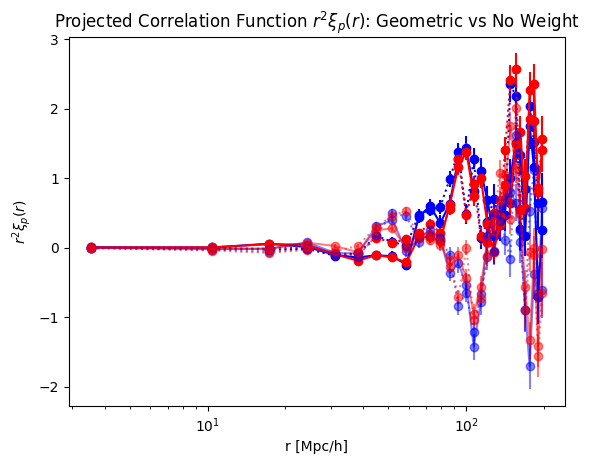

In [175]:
plt.errorbar(r, r**2 * xi_p_recon, yerr=r**2 * np.sqrt(xi_p_recon_var), fmt='bo-', label='Reconstructed (Geometric Weight)')
plt.errorbar(r, r**2 * xi_p_observed, yerr=r**2 * np.sqrt(xi_p_observed_var), fmt='b:o', label='Observed (Geometric Weight)')
# plt.errorbar(r, r**2 * xi_p_rsd, yerr=r**2 * np.sqrt(xi_p_rsd_var), fmt='bs--', label='RSD Removed (Geometric Weight)')

plt.errorbar(r, r**2 * xi_p_recon_nw, yerr=r**2 * np.sqrt(xi_p_recon_var_nw), fmt='ro-', label='Reconstructed (No Weight)')
plt.errorbar(r, r**2 * xi_p_observed_nw, yerr=r**2 * np.sqrt(xi_p_observed_var_nw), fmt='r:o', label='Observed (No Weight)')
# plt.errorbar(r, r**2 * xi_p_rsd_nw, yerr=r**2 * np.sqrt(xi_p_rsd_var_nw), fmt='rs--', label='RSD Removed (No Weight)')

plt.errorbar(r, r**2 * xi_x_recon, yerr=r**2 * np.sqrt(xi_x_recon_var), fmt='bo-', alpha=0.5, label='Reconstructed (Geometric Weight) x')
plt.errorbar(r, r**2 * xi_x_observed, yerr=r**2 * np.sqrt(xi_x_observed_var), fmt='b:o', alpha=0.5, label='Observed (Geometric Weight) x')
# plt.errorbar(r, r**2 * xi_x_rsd, yerr=r**2 * np.sqrt(xi_x_rsd_var), fmt='bs--', alpha=0.5, label='RSD Removed (Geometric Weight) x')

plt.errorbar(r, r**2 * xi_x_recon_nw, yerr=r**2 * np.sqrt(xi_x_recon_var_nw), fmt='ro-', alpha=0.5, label='Reconstructed (No Weight) x')
plt.errorbar(r, r**2 * xi_x_observed_nw, yerr=r**2 * np.sqrt(xi_x_observed_var_nw), fmt='r:o', alpha=0.5, label='Observed (No Weight) x')
# plt.errorbar(r, r**2 * xi_x_rsd_nw, yerr=r**2 * np.sqrt(xi_x_rsd_var_nw), fmt='rs--', alpha=0.5, label='RSD Removed (No Weight) x')

plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$r^2 \xi_p(r)$')
plt.title(r'Projected Correlation Function $r^2 \xi_p(r)$: Geometric vs No Weight')
plt.xscale('log')


(-0.0002, 0.0)

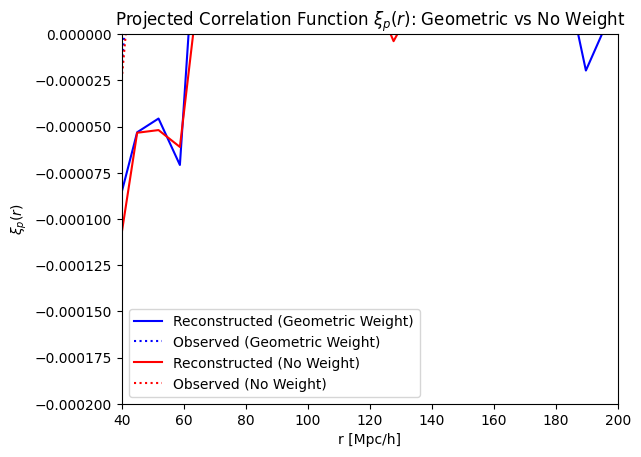

In [176]:
plt.plot(r, xi_p_recon, 'b-', label='Reconstructed (Geometric Weight)')
plt.plot(r, xi_p_observed, 'b:', label='Observed (Geometric Weight)')
# plt.plot(r, xi_p_rsd, 'b--', label='RSD Removed (Geometric Weight)')

plt.plot(r, xi_p_recon_nw, 'r-', label='Reconstructed (No Weight)')
plt.plot(r, xi_p_observed_nw, 'r:', label='Observed (No Weight)')
# plt.plot(r, xi_p_rsd_nw, 'r--', label='RSD Removed (No Weight)')

plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi_p(r)$')
plt.legend()
plt.title(r'Projected Correlation Function $\xi_p(r)$: Geometric vs No Weight')
plt.xlim( 40 , 200)
plt.ylim( -0.0002 , 0)

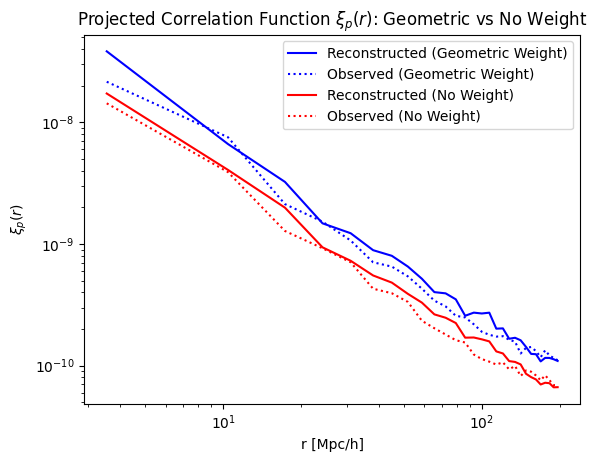

In [177]:
plt.plot(r, xi_p_recon_var, 'b-', label='Reconstructed (Geometric Weight)')
plt.plot(r, xi_p_observed_var, 'b:', label='Observed (Geometric Weight)')
# plt.plot(r, xi_p_rsd_var, 'b--', label='RSD Removed (Geometric Weight)')

plt.plot(r, xi_p_recon_var_nw, 'r-', label='Reconstructed (No Weight)')
plt.plot(r, xi_p_observed_var_nw, 'r:', label='Observed (No Weight)')
# plt.plot(r, xi_p_rsd_var_nw, 'r--', label='RSD Removed (No Weight)')

plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi_p(r)$')
plt.legend()
plt.title(r'Projected Correlation Function $\xi_p(r)$: Geometric vs No Weight')
plt.xscale('log')
plt.yscale('log')

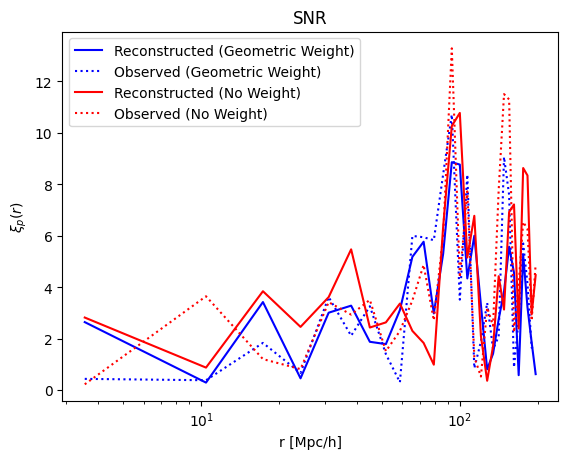

In [178]:
plt.plot(r, np.abs( xi_p_recon / xi_p_recon_var**0.5), 'b-', label='Reconstructed (Geometric Weight)')
plt.plot(r, np.abs( xi_p_observed / xi_p_observed_var**0.5), 'b:', label='Observed (Geometric Weight)')
# plt.plot(r, np.abs( xi_p_rsd / xi_p_rsd_var**0.5), 'b--', label='RSD Removed (Geometric Weight)')

plt.plot(r, np.abs( xi_p_recon_nw / xi_p_recon_var_nw**0.5), 'r-', label='Reconstructed (No Weight)')
plt.plot(r, np.abs( xi_p_observed_nw / xi_p_observed_var_nw**0.5), 'r:', label='Observed (No Weight)')
# plt.plot(r, np.abs( xi_p_rsd_nw / xi_p_rsd_var_nw**0.5), 'r--', label='RSD Removed (No Weight)')

plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi_p(r)$')
plt.legend()
plt.title(r'SNR')
plt.xscale('log')
# plt.yscale('log')

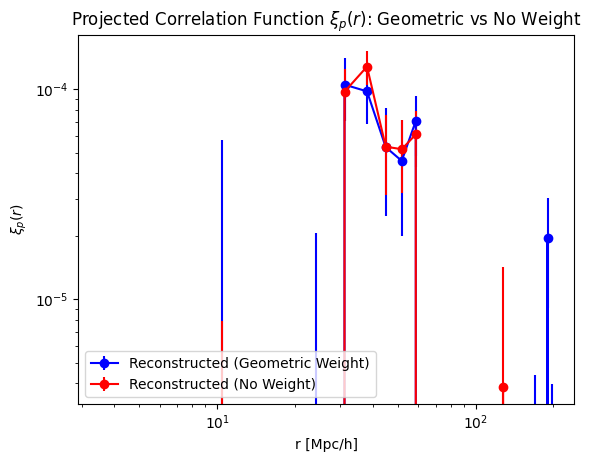

In [179]:
plt.errorbar(r, -xi_p_recon, yerr=np.sqrt(xi_p_recon_var), fmt='bo-', label='Reconstructed (Geometric Weight)')
# plt.errorbar(r, -xi_p_observed, yerr=np.sqrt(xi_p_observed_var), fmt='b:o', label='Observed (Geometric Weight)')
# plt.errorbar(r, -xi_p_rsd, yerr=np.sqrt(xi_p_rsd_var), fmt='bs--', label='RSD Removed (Geometric Weight)')

plt.errorbar(r, -xi_p_recon_nw, yerr=np.sqrt(xi_p_recon_var_nw), fmt='ro-', label='Reconstructed (No Weight)')
# plt.errorbar(r, -xi_p_observed_nw, yerr=np.sqrt(xi_p_observed_var_nw), fmt='r:o', label='Observed (No Weight)')
# plt.errorbar(r, -xi_p_rsd_nw, yerr=np.sqrt(xi_p_rsd_var_nw), fmt='rs--', label='RSD Removed (No Weight)')

plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi_p(r)$')
plt.legend()
plt.title(r'Projected Correlation Function $\xi_p(r)$: Geometric vs No Weight')
plt.xscale('log')
plt.yscale('log')

(-2.0, 3.0)

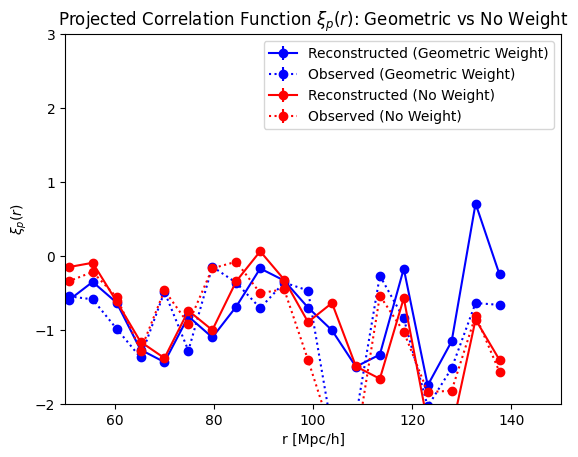

In [180]:
h = 0.7
plt.errorbar(r * h , -r**2 * xi_p_recon, yerr=np.sqrt(xi_p_recon_var), fmt='bo-', label='Reconstructed (Geometric Weight)')
plt.errorbar(r * h , -r**2 * xi_p_observed, yerr=np.sqrt(xi_p_observed_var), fmt='b:o', label='Observed (Geometric Weight)')
# plt.errorbar(r, -xi_p_rsd, yerr=np.sqrt(xi_p_rsd_var), fmt='bs--', label='RSD Removed (Geometric Weight)')

plt.errorbar(r * h , -r**2 * xi_p_recon_nw, yerr=np.sqrt(xi_p_recon_var_nw), fmt='ro-', label='Reconstructed (No Weight)')
plt.errorbar(r * h , -r**2 * xi_p_observed_nw, yerr=np.sqrt(xi_p_observed_var_nw), fmt='r:o', label='Observed (No Weight)')
# plt.errorbar(r, -xi_p_rsd_nw, yerr=np.sqrt(xi_p_rsd_var_nw), fmt='rs--', label='RSD Removed (No Weight)')

plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi_p(r)$')
plt.legend()
plt.title(r'Projected Correlation Function $\xi_p(r)$: Geometric vs No Weight')
# plt.xscale('log')
# plt.yscale('log')
plt.xlim( 50 , 150 ) 
plt.ylim( -2 , 3 )

(60, 200)

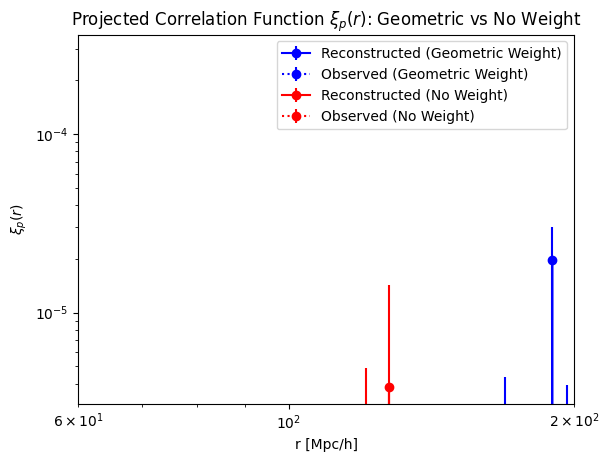

In [181]:
plt.errorbar(r, -xi_p_recon, yerr=np.sqrt(xi_p_recon_var), fmt='bo-', label='Reconstructed (Geometric Weight)')
plt.errorbar(r, -xi_p_observed, yerr=np.sqrt(xi_p_observed_var), fmt='b:o', label='Observed (Geometric Weight)')
# plt.errorbar(r, -xi_p_rsd, yerr=np.sqrt(xi_p_rsd_var), fmt='bs--', label='RSD Removed (Geometric Weight)')

plt.errorbar(r, -xi_p_recon_nw, yerr=np.sqrt(xi_p_recon_var_nw), fmt='ro-', label='Reconstructed (No Weight)')
plt.errorbar(r, -xi_p_observed_nw, yerr=np.sqrt(xi_p_observed_var_nw), fmt='r:o', label='Observed (No Weight)')
# plt.errorbar(r, -xi_p_rsd_nw, yerr=np.sqrt(xi_p_rsd_var_nw), fmt='rs--', label='RSD Removed (No Weight)')

plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi_p(r)$')
plt.legend()
plt.title(r'Projected Correlation Function $\xi_p(r)$: Geometric vs No Weight')
plt.xscale('log')
plt.yscale('log')
plt.xlim( 60 , 200 )

# LRG

In [138]:
r_bins = np.linspace( 0.1 , 200 , 20 )
r_bins = np.logspace( np.log10( 0.5) , np.log10( 200 ) , 20 )
# r_bins = np.linspace( 40 / 0.7 , 200 / 0.7 , 22 )

# rper_cents = np.linspace( 0.1 , 200, 200 )
# rpar_cents = np.linspace( -200, 200, 400 )


rper_cents = np.linspace( 0.1 , 200, 100 )
rpar_cents = np.linspace( -200, 200, 200 )

In [139]:
r, xi_p_recon_nw, xi_p_recon_var_nw, xi_x_recon_nw, xi_x_recon_var_nw, weights_recon = calculate_results( LRG_xi_gn_p_reconstructed_reconstructed,
                                                                                                LRG_xi_gn_x_reconstructed_reconstructed,
                                                                                                LRG_xi_gn_var_reconstructed_reconstructed,
                                                                                                bins=r_bins,
                                                                                                custom_weight_func=no_weights,
                                                                                                rper=rper_cents,
                                                                                                rpar=rpar_cents
                                                                                            )

r, xi_p_observed_nw, xi_p_observed_var_nw, xi_x_observed_nw, xi_x_observed_var_nw, weights_observed_nw = calculate_results( LRG_xi_gn_p_observed_observed,
                                                                                                LRG_xi_gn_x_observed_observed,
                                                                                                LRG_xi_gn_var_observed_observed,
                                                                                                bins=r_bins,
                                                                                                custom_weight_func=no_weights,
                                                                                                rper=rper_cents,
                                                                                                rpar=rpar_cents
                                                                                            )

r, xi_p_rsd_nw, xi_p_rsd_var_nw, xi_x_rsd_nw, xi_x_rsd_var_nw, weights_rsd_nw = calculate_results( LRG_xi_gn_p_rsd_removed_rsd_removed,
                                                                                                LRG_xi_gn_x_rsd_removed_rsd_removed,
                                                                                                LRG_xi_gn_var_rsd_removed_rsd_removed,
                                                                                                bins=r_bins,
                                                                                                custom_weight_func=no_weights,
                                                                                                rper=rper_cents,
                                                                                                rpar=rpar_cents
                                                                                            )

r, xi_p_recon, xi_p_recon_var, xi_x_recon, xi_x_recon_var, weights_recon = calculate_results( LRG_xi_gn_p_reconstructed_reconstructed,
                                                                                                LRG_xi_gn_x_reconstructed_reconstructed,
                                                                                                LRG_xi_gn_var_reconstructed_reconstructed,
                                                                                                bins=r_bins,
                                                                                                custom_weight_func=geometric_weight_function,
                                                                                                rper=rper_cents,
                                                                                                rpar=rpar_cents
                                                                                            )

r, xi_p_observed, xi_p_observed_var, xi_x_observed, xi_x_observed_var, weights_observed = calculate_results( LRG_xi_gn_p_observed_observed,
                                                                                                LRG_xi_gn_x_observed_observed,
                                                                                                LRG_xi_gn_var_observed_observed,
                                                                                                bins=r_bins,
                                                                                                custom_weight_func=geometric_weight_function,
                                                                                                rper=rper_cents,
                                                                                                rpar=rpar_cents
                                                                                            )

r, xi_p_rsd, xi_p_rsd_var, xi_x_rsd, xi_x_rsd_var, weights_rsd = calculate_results( LRG_xi_gn_p_rsd_removed_rsd_removed,
                                                                                                LRG_xi_gn_x_rsd_removed_rsd_removed,
                                                                                                LRG_xi_gn_var_rsd_removed_rsd_removed,
                                                                                                bins=r_bins,
                                                                                                custom_weight_func=geometric_weight_function,
                                                                                                rper=rper_cents,
                                                                                                rpar=rpar_cents
                                                                                            )

(-2.0, 3.0)

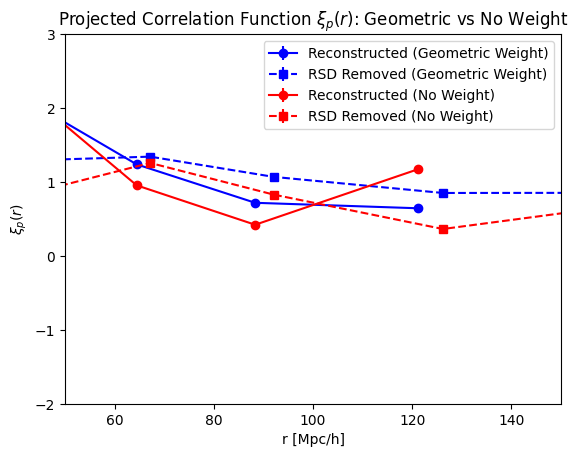

In [140]:
h = 0.7
plt.errorbar(r * h , -r**2 * xi_p_recon, yerr=np.sqrt(xi_p_recon_var), fmt='bo-', label='Reconstructed (Geometric Weight)')
# plt.errorbar(r * h , -r**2 * xi_p_observed, yerr=np.sqrt(xi_p_observed_var), fmt='b:o', label='Observed (Geometric Weight)')
plt.errorbar(r, -r**2 * xi_p_rsd, yerr=np.sqrt(xi_p_rsd_var), fmt='bs--', label='RSD Removed (Geometric Weight)')

plt.errorbar(r * h , -r**2 * xi_p_recon_nw, yerr=np.sqrt(xi_p_recon_var_nw), fmt='ro-', label='Reconstructed (No Weight)')
# plt.errorbar(r * h , -r**2 * xi_p_observed_nw, yerr=np.sqrt(xi_p_observed_var_nw), fmt='r:o', label='Observed (No Weight)')
plt.errorbar(r, -r**2 * xi_p_rsd_nw, yerr=np.sqrt(xi_p_rsd_var_nw), fmt='rs--', label='RSD Removed (No Weight)')

plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi_p(r)$')
plt.legend()
plt.title(r'Projected Correlation Function $\xi_p(r)$: Geometric vs No Weight')
# plt.xscale('log')
# plt.yscale('log')
plt.xlim( 50 , 150 ) 
plt.ylim( -2 , 3 )

Text(0.5, 1.0, 'Projected Correlation Function $\\xi_p(r)$: Geometric vs No Weight')

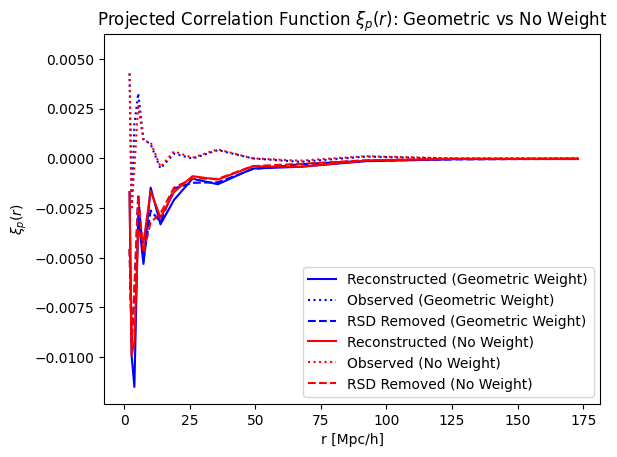

In [141]:
plt.plot(r, xi_p_recon, 'b-', label='Reconstructed (Geometric Weight)')
plt.plot(r, xi_p_observed, 'b:', label='Observed (Geometric Weight)')
plt.plot(r, xi_p_rsd, 'b--', label='RSD Removed (Geometric Weight)')

plt.plot(r, xi_p_recon_nw, 'r-', label='Reconstructed (No Weight)')
plt.plot(r, xi_p_observed_nw, 'r:', label='Observed (No Weight)')
plt.plot(r, xi_p_rsd_nw, 'r--', label='RSD Removed (No Weight)')

plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi_p(r)$')
plt.legend()
plt.title(r'Projected Correlation Function $\xi_p(r)$: Geometric vs No Weight')

Text(0.5, 1.0, 'Projected Correlation Function $\\xi_p(r)$: Geometric vs No Weight')

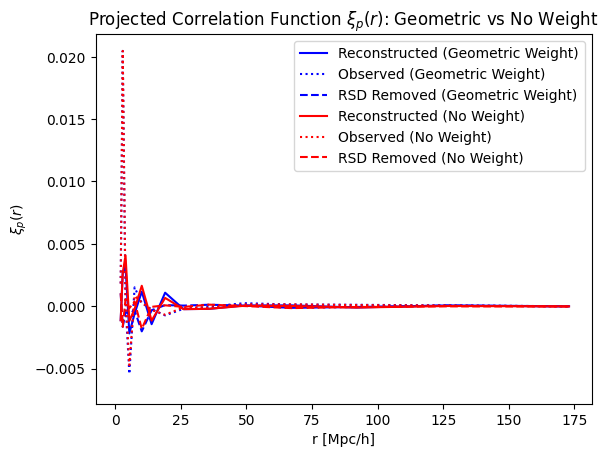

In [142]:
plt.plot(r, xi_x_recon, 'b-', label='Reconstructed (Geometric Weight)')
plt.plot(r, xi_x_observed, 'b:', label='Observed (Geometric Weight)')
plt.plot(r, xi_x_rsd, 'b--', label='RSD Removed (Geometric Weight)')

plt.plot(r, xi_x_recon_nw, 'r-', label='Reconstructed (No Weight)')
plt.plot(r, xi_x_observed_nw, 'r:', label='Observed (No Weight)')
plt.plot(r, xi_x_rsd_nw, 'r--', label='RSD Removed (No Weight)')

plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi_p(r)$')
plt.legend()
plt.title(r'Projected Correlation Function $\xi_p(r)$: Geometric vs No Weight')

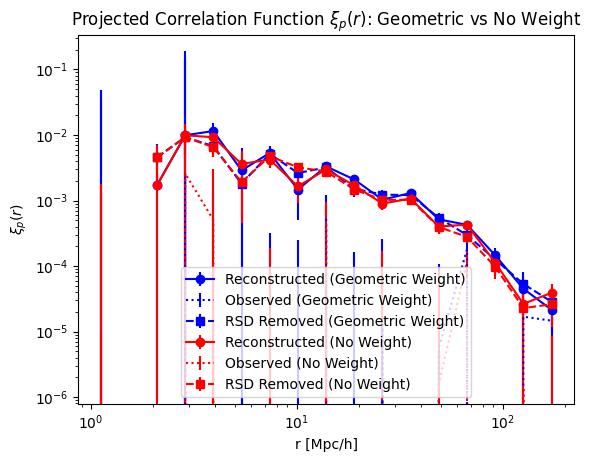

In [143]:
plt.errorbar(r, -xi_p_recon, yerr=np.sqrt(xi_p_recon_var), fmt='bo-', label='Reconstructed (Geometric Weight)')
plt.errorbar(r, -xi_p_observed, yerr=np.sqrt(xi_p_observed_var), fmt='b:', label='Observed (Geometric Weight)')
plt.errorbar(r, -xi_p_rsd, yerr=np.sqrt(xi_p_rsd_var), fmt='bs--', label='RSD Removed (Geometric Weight)')

plt.errorbar(r, -xi_p_recon_nw, yerr=np.sqrt(xi_p_recon_var_nw), fmt='ro-', label='Reconstructed (No Weight)')
plt.errorbar(r, -xi_p_observed_nw, yerr=np.sqrt(xi_p_observed_var_nw), fmt='r:', label='Observed (No Weight)')
plt.errorbar(r, -xi_p_rsd_nw, yerr=np.sqrt(xi_p_rsd_var_nw), fmt='rs--', label='RSD Removed (No Weight)')

plt.xlabel('r [Mpc/h]')
plt.ylabel(r'$\xi_p(r)$')
plt.legend()
plt.title(r'Projected Correlation Function $\xi_p(r)$: Geometric vs No Weight')
plt.xscale('log')
plt.yscale('log')

In [143]:
lrg_xi_gn_p_results = np.load('/home/murray/intrinsic_alignments/notebooks/recon_lrg_xi_gn_p_results.npy')
lrg_xi_gn_x_results = np.load('/home/murray/intrinsic_alignments/notebooks/recon_lrg_xi_gn_x_results.npy')

# lrg_rperp = np.load('/home/murray/intrinsic_alignments/notebooks/recon_lrg_rperp.npy')
# lrg_rpar = np.load('/home/murray/intrinsic_alignments/notebooks/recon_lrg_rpar.npy')

lrg_rperp = np.linspace(0, 200, 100)  # Placeholder for rperp
lrg_rpar = np.linspace(-200, 200, 200)  # Placeholder

lrg_xi_var_results = np.load('/home/murray/intrinsic_alignments/notebooks/recon_lrg_var_results.npy')



In [144]:
weighted_r , weighted_xi, weighted_var_xi , weighted_wgrid = bin_correlation_function( lrg_rperp, 
                                   lrg_rpar, 
                                   lrg_xi_gn_p_results, 
                                   lrg_xi_var_results, bins=np.linspace(0, 200, 20), 
                                   custom_weight_func=geometric_weight_function)

r , xi, var_xi , wgrid = bin_correlation_function( lrg_rperp, 
                                   lrg_rpar, 
                                   lrg_xi_gn_p_results, 
                                   lrg_xi_var_results, bins=np.linspace(0, 200, 20), 
                                   custom_weight_func=no_weights)

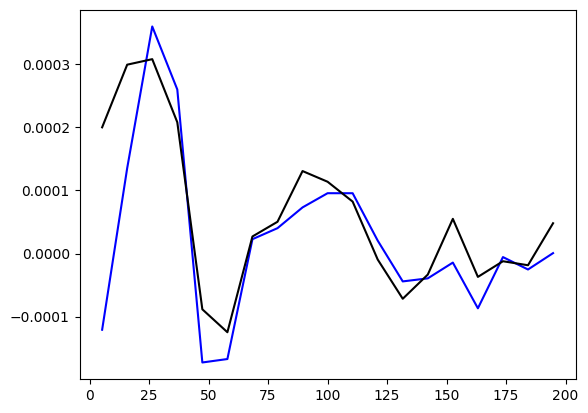

In [145]:
plt.plot( r , weighted_xi , 'b-', label='Geometric Weight Function') 
plt.plot( r , xi , 'k-', label='No Weight Function') 

<ErrorbarContainer object of 3 artists>

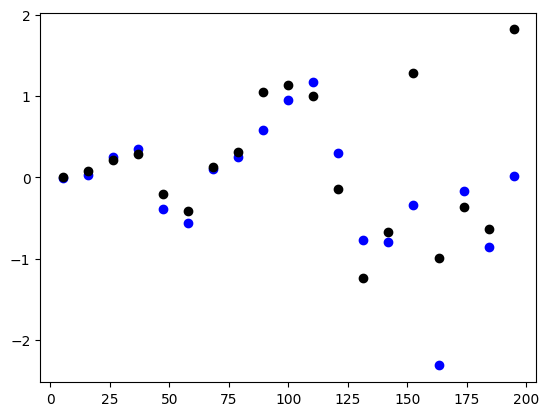

In [147]:
plt.errorbar( r , r**2 * weighted_xi , yerr = weighted_var_xi**0.5 , fmt ='bo', label='Geometric Weight Function') 
plt.errorbar( r , r**2 * xi , yerr = var_xi**0.5 , fmt ='ko', label='No Weight Function') 

In [23]:
plt.imshow( weight.T )
plt.colorbar(label='Weight Function Value')

NameError: name 'weight' is not defined